# The Train Problem.

JCA, FIA ICA 23-24

## some base functions of use...

In [7]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

from scipy.stats import norm

def multiply (prior, likelihood):
    return [p*l for p,l in zip(prior,likelihood)]

def normalize(vector):
    suma = sum(vector)
    return [val/suma for val in vector]


def simplePlot(vector,title=""):
    fig, ax = plt.subplots()
    ax.plot(range(1,len(vector)+1), vector)
    ax.set_title(title)
    plt.show()
    return ax
    
def simplePlotXY(x,y,title=""):
    fig, ax = plt.subplots()
    ax.plot(x,y)
    ax.set_title(title)
    return ax
    
def expect(vector):
    return sum(i*val for i,val in enumerate(vector))

def cmf(pmf):
    return [ sum(pmf[:i]) for i in range(1,len(pmf)+1)]
    
def confidenceInterval(pmf, x=None, low=0.05, high=0.95):
    _cmf = cmf(pmf)
    
    i_low  = sum(point <= low for point in _cmf)
    i_high = sum(point >= high for point in _cmf)
    if x:
        return (x[i_low],x[-i_high])
    else:
        return (i_low, len(pmf) - i_high)
    

The hypothesis is for the fleet size to be in the range $[1,N]$

Therefore the prior is a pmf like this...

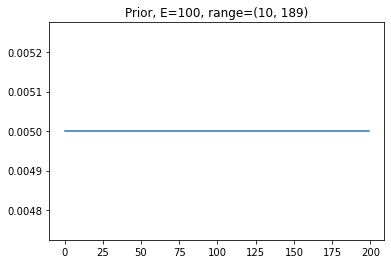

In [10]:
N = 200
x = range(N)
prior = [1./N]*N
simplePlotXY(x,prior,f"Prior, E={expect(prior):.0f}, range={confidenceInterval(prior)}")
plt.show()

NOw lets bring the evidence. We find a number in the range, say $n_1$,

what is the likelihood ??

It is clear that the likelihood is as follows:

$ P(n_1 | \theta) = 0 $       if $ \theta < n_1 $  since for a value of $N$ cannot produce an instance greater  
$ P(n_1 | \theta ) = 1/\theta $  if $ \theta \ge n_1 $  since all values $1,2,...,\theta$ are now equally likely

Lets plot the likelihood for, say , n_1 = 90

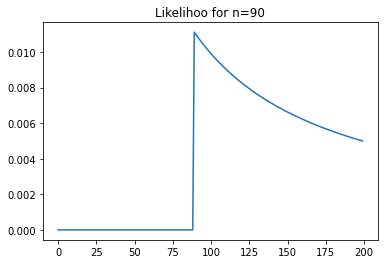

In [11]:
N = 200
n1 = 90
L1 = [0.0]* N
for n in range (n1-1,N):
    L1[n] = 1.0 / (n+1)
    
simplePlotXY(x,L1,f"Likelihoo for n={n1}")
plt.show()

Lets multiply and Normalize the posterior

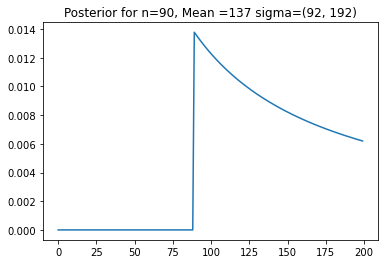

In [13]:


posterior = normalize(multiply(prior, L1))
simplePlotXY(x,posterior,f"Posterior for n={n1}, Mean ={expect(posterior):.0f} sigma={confidenceInterval(posterior)}")
plt.show()

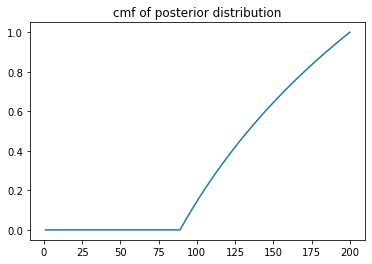

(92, 192)


In [14]:
# or plot cumulative
simplePlot(cmf(posterior),title="cmf of posterior distribution")
print(confidenceInterval(posterior))

Lets wait and, and a new data point, $n_2$ appears.

Again the likelihood is the same...

Lets plot the likelihood for, say , n_2 = 105

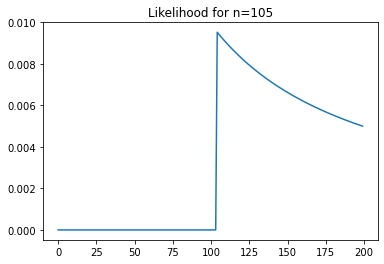

In [16]:
n2 = 105
L2 = [0.0]* N
for n in range (n2-1,N):
    L2[n] = 1.0 / (n+1)
    
simplePlotXY(x,L2,f"Likelihood for n={n2}")
plt.show()


Now the posterior after the two data points is P*L1*l2

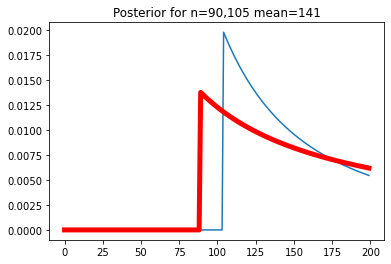

In [17]:
posterior2 = normalize(multiply(posterior, L2))
ax = simplePlotXY(x,posterior2,f"Posterior for n={n1},{n2} mean={expect(posterior2):.0f}")
ax.plot(x,posterior,color='r',lw=5)
plt.show()

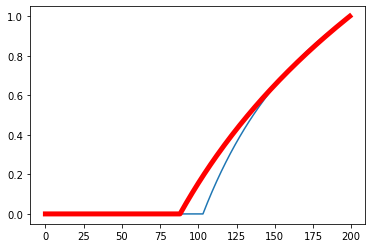

In [19]:
# or plot cumulative
ax = simplePlotXY(x,cmf(posterior2))
ax.plot(x,cmf(posterior),color='r',lw=5)
plt.show()

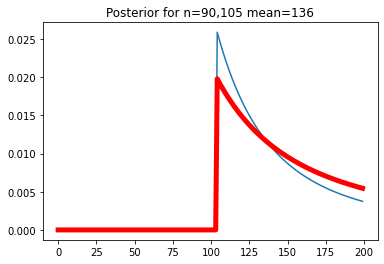

In [21]:
# lets add a point way low....
def addDataPoint (prior, n_i):
    L = [0.0]* N
    for _n in range (n_i-1,N):
        L[_n] = 1.0 / (_n+1)
    return normalize(multiply(prior, L))

post = addDataPoint(posterior2,30)
ax = simplePlotXY(x,post,f"Posterior for n={n1},{n2} mean={expect(post):.0f}")
ax.plot(x,posterior2,color='r',lw=5)
plt.show()

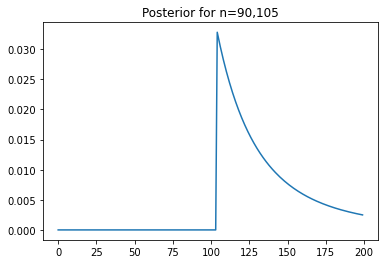

In [22]:


post2 = addDataPoint(post,60)
ax = simplePlotXY(x,post2,f"Posterior for n={n1},{n2}")

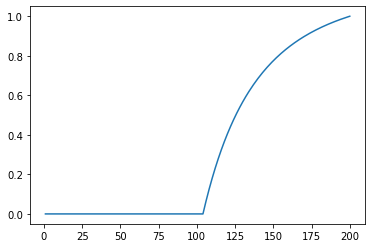

(105, 183)


In [23]:
# or plot cumulative
simplePlot(cmf(post2))
print(confidenceInterval(post2))

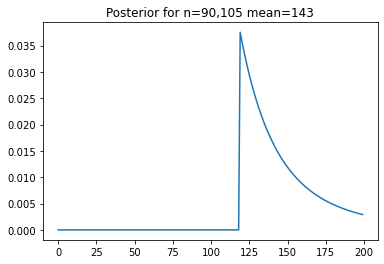

In [24]:

post3 = addDataPoint(post2,120)
ax = simplePlotXY(x,post3,f"Posterior for n={n1},{n2} mean={expect(post3):.0f}")


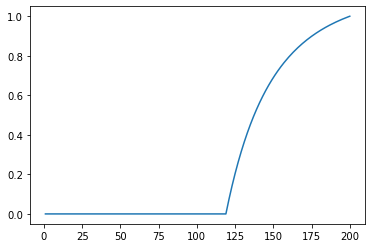

(120, 185)


In [25]:
# or plot cumulative
simplePlot(cmf(post3))
print(confidenceInterval(post3))

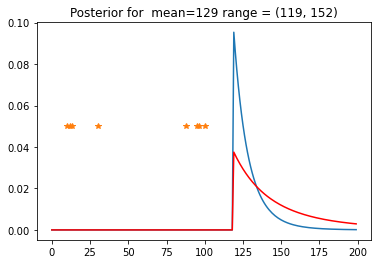

In [26]:
# now a deluge of data comes in

data = [ 10,100,13,30,88,12,96,95]

# applying it repetively
post = post3
for dp in data:
    post  = addDataPoint(post,dp)
    
ax = simplePlotXY(x,post,f"Posterior for  mean={expect(post):.0f} range = {confidenceInterval(post)}")
ax.plot(x,post3, color='r')
ax.plot(data,[0.05]*len(data), marker='*',lw=0)
None

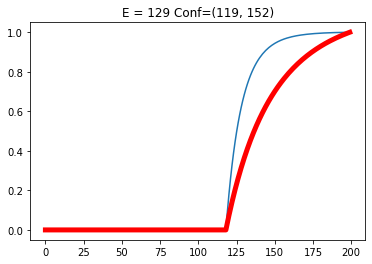

In [27]:
# or plot cumulative
ax = simplePlotXY(x,cmf(post),title = f"E = {expect(post):.0f} Conf={confidenceInterval(post)}")
ax.plot(x,cmf(post3),color='r',lw=5,label="pre-data")
plt.show()
